# 2. Step function

In [35]:
import numpy as np
import matplotlib.pyplot as plt

Space points = 101 dx = 0.1
Time points = 401 dt = 0.05


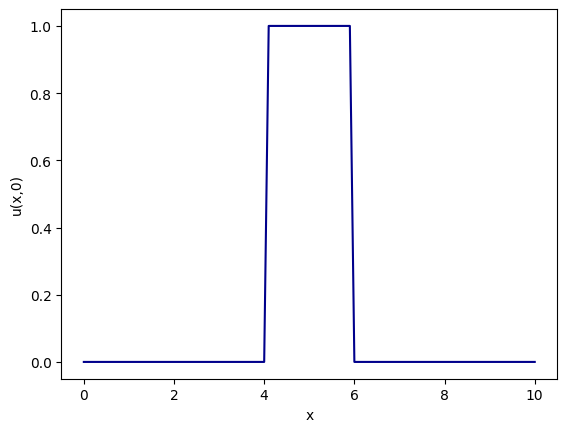

In [38]:
J = 101
dx = (10-0)/(J-1)
x = np.linspace(0,10,J)
u0 = np.zeros(J)
for i in range(J):
    if x[i]>4 and x[i]<6:          # initial function
        u0[i] = 1
    else:
        u0[i] = 0
plt.plot(x,u0, color='darkblue')
plt.xlabel('x')
plt.ylabel('u(x,0)')
#plt.savefig('step_ini.png',dpi=300)
print('Space points =',len(x),'dx =',dx)

# TIME
T = 20     # final time
cf = 0.5   # Courant factor
a = 1     # max of the initial function (max of the velocity)
dt = cf*dx/a
Nt = int(T/dt + 1)  # number of time intervals
print('Time points =',Nt,'dt =',dt)
#plt.savefig('./Homework_1/images/2_initial.png',dpi=150)

### Lax - Friedrichs

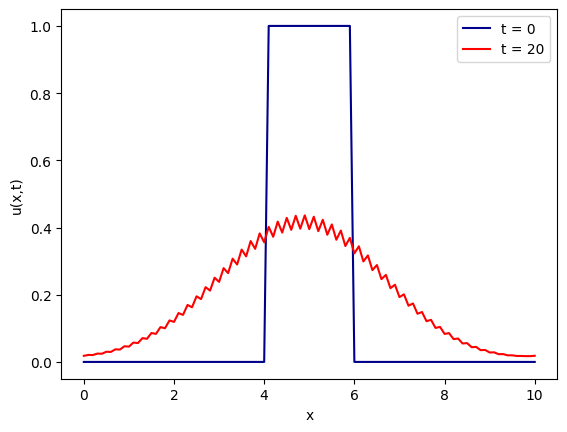

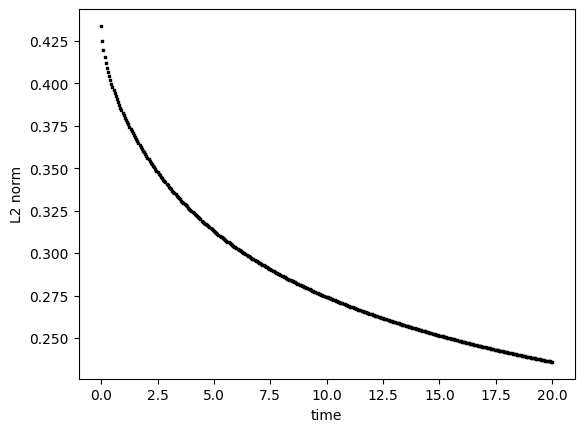

In [39]:
u_current_LF = u0.copy()
l2norm_LF = []
l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))

time = []
time.append(0)
t = 0

while t<T:
    u_next_LF = 0.5*(np.roll(u_current_LF,-1) + np.roll(u_current_LF,1)) - a*dt/2/dx *(np.roll(u_current_LF,-1) - np.roll(u_current_LF,1))    
        
    u_current_LF = u_next_LF.copy()
    
    l2norm_LF.append( np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)) )
    
    t = t+dt
    time.append(t)
        

plt.plot(x,u0,color='darkblue',label='t = 0')
plt.plot(x,u_current_LF,color='r',label='t = '+str(T))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
#plt.savefig('./Homework_1/images/2_final_LF.png',dpi=150)
plt.show()

plt.scatter(time,l2norm_LF,marker='s',s=2,c='k')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.show()

### Lax - Wendroff

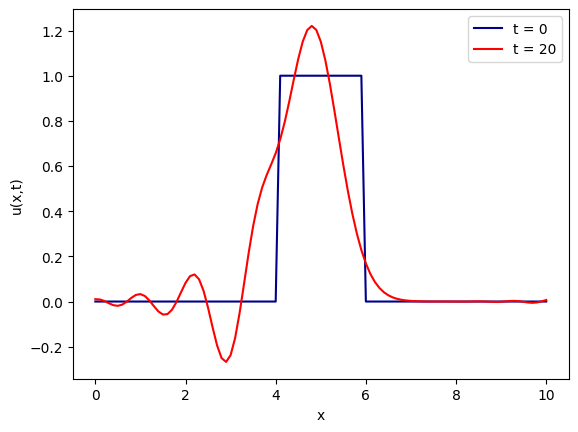

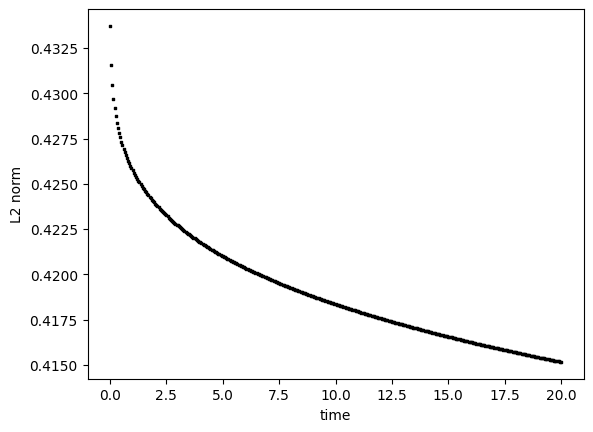

In [19]:
u_current_LW = u0.copy()
l2norm_LW = []
l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))

time = []
time.append(0)
t = 0

while t<T:
    u_next_LW = u_current_LW - 0.5*(a*dt/dx) *(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_LW,1) + np.roll(u_current_LW,-1) - 2*u_current_LW)
        
    u_current_LW = u_next_LW.copy()
    
    l2norm_LW.append( np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)) )

    t = t+dt
    time.append(t)
    
plt.plot(x,u0,color='darkblue',label='t = 0')
plt.plot(x,u_current_LW,color='r',label='t = '+str(T))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
#plt.savefig('./Homework_1/images/2_final_LW.png',dpi=150)
plt.show()

plt.scatter(time,l2norm_LW,marker='s',s=2,c='k')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.show()

### L2 norm

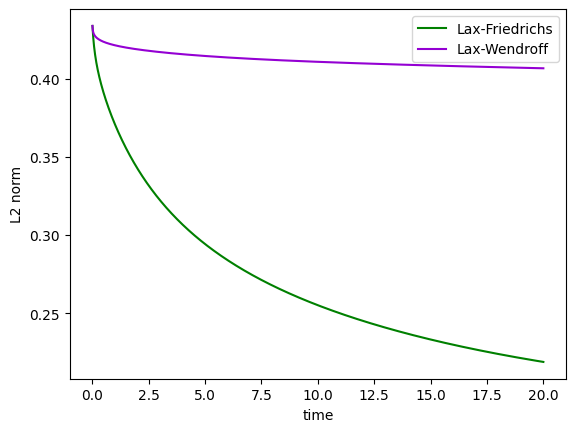

1.858581398684098

In [80]:
plt.plot(time,l2norm_LF,color='g',label='Lax-Friedrichs')
plt.plot(time,l2norm_LW,color='darkviolet',label='Lax-Wendroff')
plt.xlabel('time')
plt.ylabel('L2 norm')
plt.legend()
#plt.savefig('./Homework_1/images/2_norms.png',dpi=150)
plt.show()
index = int( len(time)-1 )
l2norm_LW[index]/l2norm_LF[index]

## Time evolution

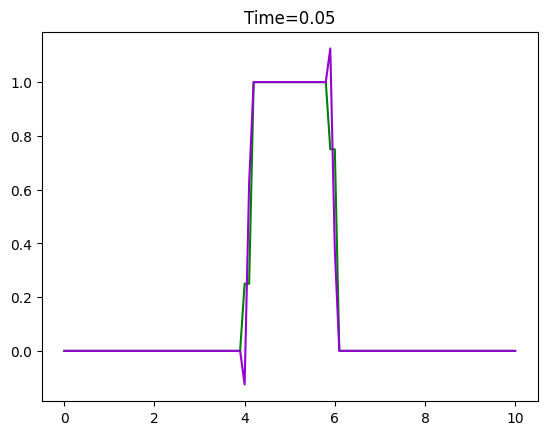

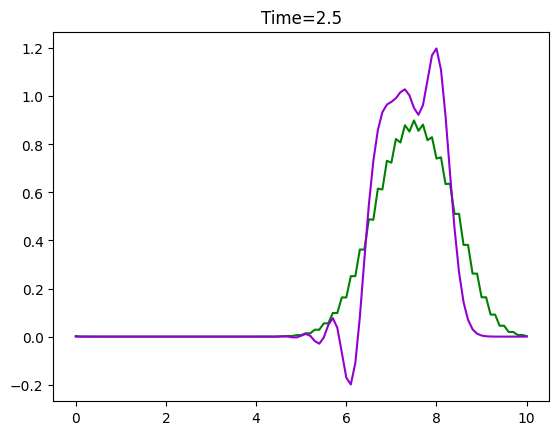

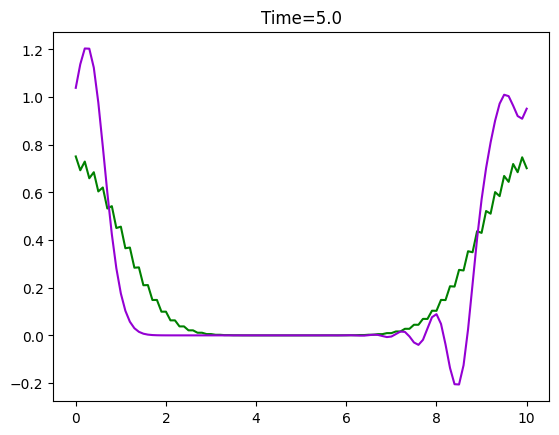

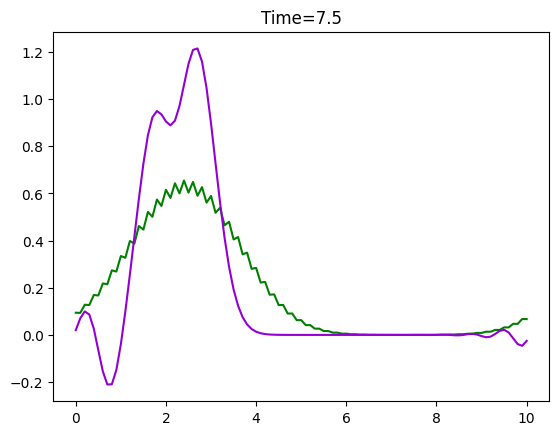

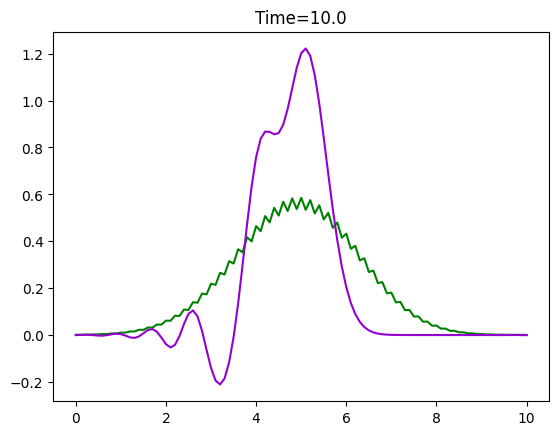

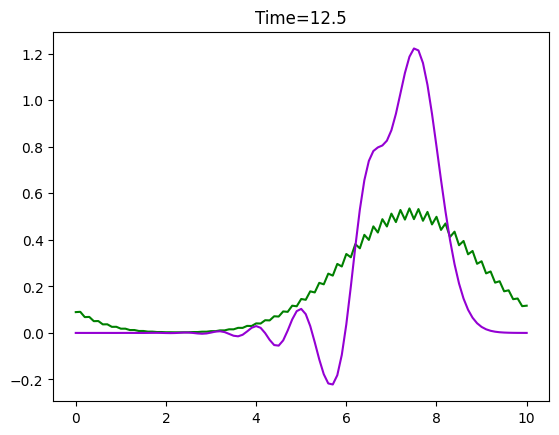

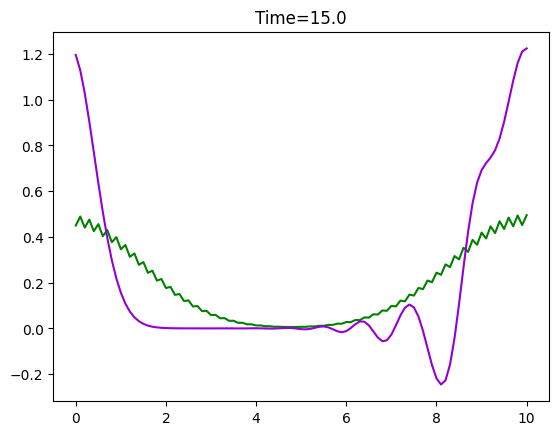

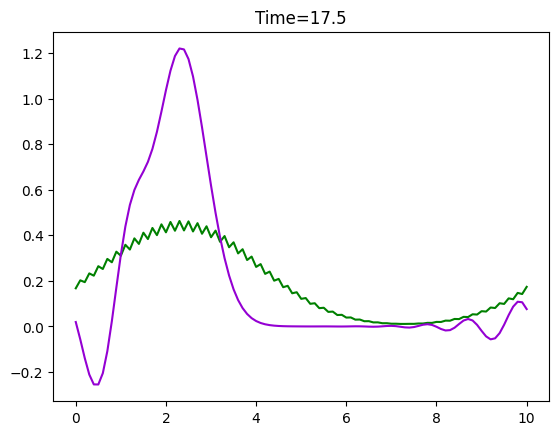

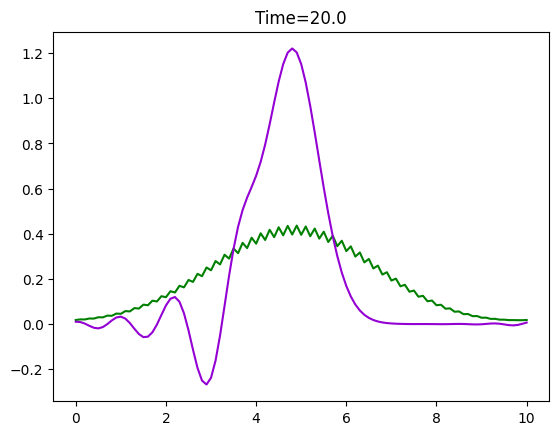

In [12]:
u_current_LF = u0.copy()
u_current_LW = u0.copy()
t = 0
j = 0
k = 0

while t<T:
    if (j)%50==0 and j!=0:
        k+=1
        plt.plot(x,u_current_LF,color='g')
        plt.plot(x,u_current_LW,color='darkviolet')
        plt.title('Time='+str(round(t,2)))
        #plt.savefig('./Homework_1/images/2_time_'+str(k)+'.png',dpi=150)
        plt.show()
    j += 1
    u_next_LF = 0.5*(np.roll(u_current_LF,-1) + np.roll(u_current_LF,1)) - a*dt/2/dx *(np.roll(u_current_LF,-1) - np.roll(u_current_LF,1))    
    u_current_LF = u_next_LF.copy()
    u_next_LW = u_current_LW - 0.5*(a*dt/dx) *(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_LW,1) + np.roll(u_current_LW,-1) - 2*u_current_LW)
    u_current_LW = u_next_LW.copy()    
    t = t+dt
    if j==1:
        k+=1
        plt.plot(x,u_current_LF,color='g')
        plt.plot(x,u_current_LW,color='darkviolet')
        plt.title('Time='+str(round(t,2)))
        #plt.savefig('./Homework_1/images/2_time_'+str(k)+'.png',dpi=150)
        plt.show()
    
    
k+=1
plt.plot(x,u_current_LF,color='g')
plt.plot(x,u_current_LW,color='darkviolet')
plt.title('Time='+str(round(t,2)))
#plt.savefig('./Homework_1/images/2_time_'+str(k)+'.png',dpi=150)
plt.show()    

## Changing J

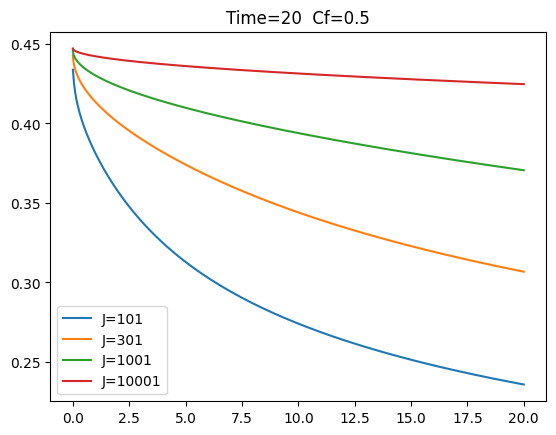

In [46]:
cf = 0.5
J = [101,301,1001,10001]

for N in J:
    x = np.linspace(0,10,N)
    u0 = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u0[i] = 1
        else:
            u0[i] = 0
    u_current_LF = u0.copy()
    t = 0
    time = []
    time.append(t)
    l2norm_LF = []
    l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<T:
        u_next_LF = 0.5*(np.roll(u_current_LF,-1) + np.roll(u_current_LF,1)) - a*dt/2/dx *(np.roll(u_current_LF,-1) - np.roll(u_current_LF,1))    
        u_current_LF = u_next_LF.copy()
        l2norm_LF.append( np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)) )

        t = t+dt
        time.append(t)
        
    #plt.plot(x,u_current_LF,label='J='+str(N))
    plt.plot(time,l2norm_LF,label='J='+str(N))
    
plt.title('Time=20  Cf=0.5')
plt.legend()
#plt.savefig('./Homework_1/images/2_J_LF.png',dpi=150)
#plt.savefig('./Homework_1/images/2_Jnorm_LF.png',dpi=150)
plt.show()
  

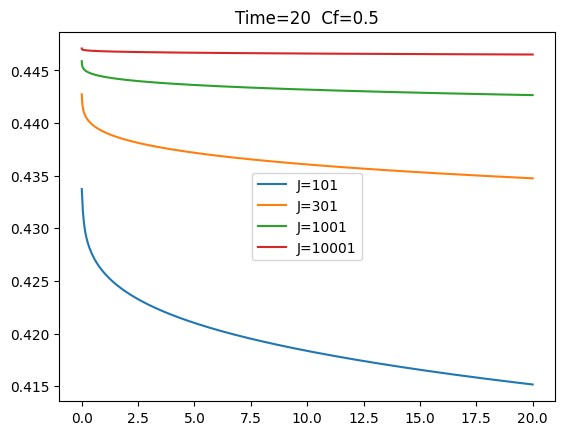

In [48]:
cf = 0.5
J = [101, 301, 1001, 10001]

for N in J:
    x = np.linspace(0,10,N)
    u0 = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u0[i] = 1
        else:
            u0[i] = 0
    u_current_LW = u0.copy()
    l2norm_LW = []
    l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))
    time = []
    time.append(0)
    t = 0

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<T:
        u_next_LW = u_current_LW - 0.5*(a*dt/dx) *(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_LW,1) + np.roll(u_current_LW,-1) - 2*u_current_LW)
        u_current_LW = u_next_LW.copy() 
        l2norm_LW.append( np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)) )

        t = t+dt
        time.append(t)
    
    #plt.plot(x,u_current_LW,label='J='+str(N))
    plt.plot(time,l2norm_LW,label='J='+str(N))
    
plt.title('Time=20  Cf=0.5')
plt.legend()
#plt.savefig('./Homework_1/images/2_J_LW.png',dpi=150)
#plt.savefig('./Homework_1/images/2_Jnorm_LW.png',dpi=150)
plt.show()

## Changing Cf

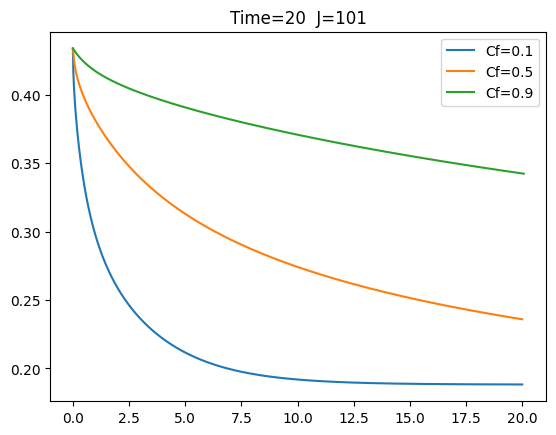

In [52]:
N = 101
CF = [0.1, 0.5, 0.9]

x = np.linspace(0,10,N)
u0 = np.zeros(N)
for i in range(N):
    if x[i]>4 and x[i]<6:          
        u0[i] = 1
    else:
        u0[i] = 0

for cf in CF:
    x = np.linspace(0,10,N)
    u0 = np.zeros(N)
    for i in range(N):
        if x[i]>4 and x[i]<6:          
            u0[i] = 1
        else:
            u0[i] = 0
    u_current_LF = u0.copy()
    t = 0
    time = []
    time.append(t)
    l2norm_LF = []
    l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<T:
        u_next_LF = 0.5*(np.roll(u_current_LF,-1) + np.roll(u_current_LF,1)) - a*dt/2/dx *(np.roll(u_current_LF,-1) - np.roll(u_current_LF,1))    
        u_current_LF = u_next_LF.copy()
        l2norm_LF.append( np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)) )

        t = t+dt
        time.append(t)
    
    #plt.plot(x,u_current_LF,label='Cf='+str(cf))
    plt.plot(time,l2norm_LF,label='Cf='+str(cf))

plt.legend()
plt.title('Time=20  J=101')
#plt.savefig('./Homework_1/images/2_cf_LF.png',dpi=150)
#plt.savefig('./Homework_1/images/2_cfnorm_LF.png',dpi=150)
plt.show()


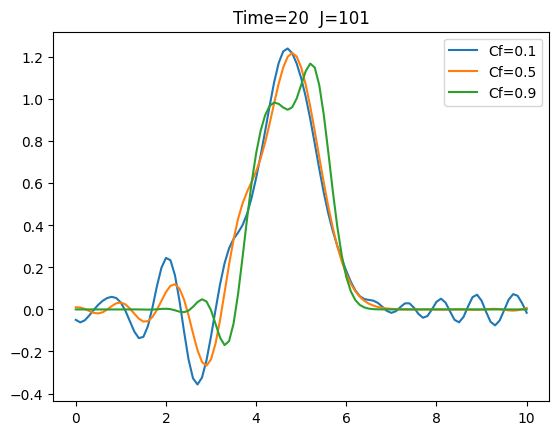

In [59]:
N = 101
CF = [0.1, 0.5, 0.9]

x = np.linspace(0,10,N)
u0 = np.zeros(N)
for i in range(N):
    if x[i]>4 and x[i]<6:          
        u0[i] = 1
    else:
        u0[i] = 0

for cf in CF:
    u_current_LW = u0.copy()
    l2norm_LW = []
    l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))
    time = []
    time.append(0)
    t = 0

    dx = 10/(N-1)
    dt = cf*dx/a
    while t<T:
        u_next_LW = u_current_LW - 0.5*(a*dt/dx) *(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_LW,1) + np.roll(u_current_LW,-1) - 2*u_current_LW)
        u_current_LW = u_next_LW.copy()    
        l2norm_LW.append( np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)) )

        t = t+dt
        time.append(t)
    
    plt.plot(x,u_current_LW,label='Cf='+str(cf))
    #plt.plot(time,l2norm_LW,label='Cf='+str(cf))
    
plt.legend()
plt.title('Time=20  J=101')
#plt.savefig('./Homework_1/images/2_cf_LW.png',dpi=150)
#plt.savefig('./Homework_1/images/2_cfnorm_LW.png',dpi=150)
plt.show()

## Changing J, Cf

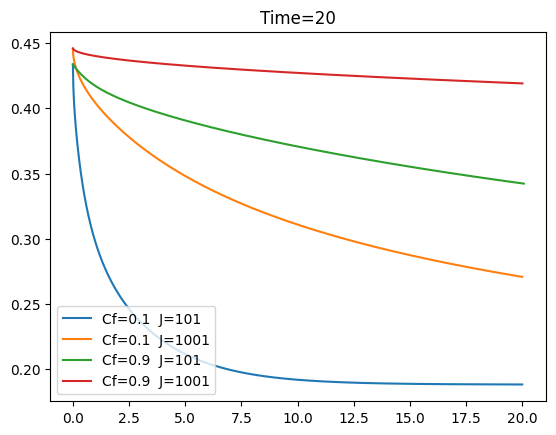

In [64]:
J = [101, 1001]
CF = [0.1, 0.9]

for cf in CF:
    for N in J:
        x = np.linspace(0,10,N)
        u0 = np.zeros(N)
        for i in range(N):
            if x[i]>4 and x[i]<6:          
                u0[i] = 1
            else:
                u0[i] = 0
                
        u_current_LF = u0.copy()
        t = 0
        time = []
        time.append(t)
        l2norm_LF = []
        l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))

        dx = 10/(N-1)
        dt = cf*dx/a
        while t<T:
            u_next_LF = 0.5*(np.roll(u_current_LF,-1) + np.roll(u_current_LF,1)) - a*dt/2/dx *(np.roll(u_current_LF,-1) - np.roll(u_current_LF,1))    
            u_current_LF = u_next_LF.copy()  
            l2norm_LF.append( np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)) )

            t = t+dt
            time.append(t)

        #plt.plot(x,u_current_LF,label='Cf='+str(cf)+'  J='+str(N))
        plt.plot(time,l2norm_LF,label='Cf='+str(cf)+'  J='+str(N))
        
plt.legend()
plt.title('Time=20')
#plt.savefig('./Homework_1/images/2_Jcf_LF.png',dpi=150)
#plt.savefig('./Homework_1/images/2_Jcfnorm_LF.png',dpi=150)
plt.show()

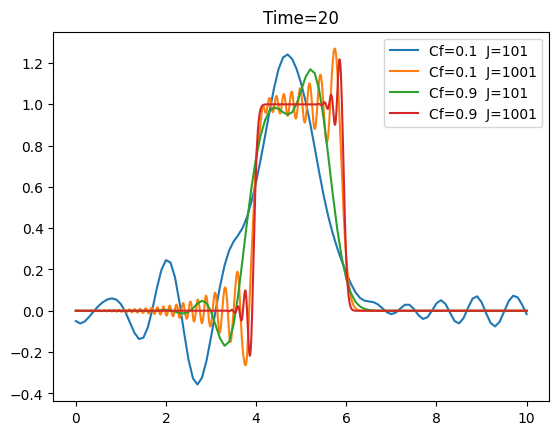

In [66]:
J = [101, 1001]
CF = [0.1, 0.9]

for cf in CF:
    for N in J:
        x = np.linspace(0,10,N)
        u0 = np.zeros(N)
        for i in range(N):
            if x[i]>4 and x[i]<6:          
                u0[i] = 1
            else:
                u0[i] = 0
                
        u_current_LW = u0.copy()
        l2norm_LW = []
        l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))
        time = []
        time.append(0)
        t = 0

        dx = 10/(N-1)
        dt = cf*dx/a
        while t<T:
            u_next_LW = u_current_LW - 0.5*(a*dt/dx) *(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + 0.5*((a*dt/dx)**2) * (np.roll(u_current_LW,1) + np.roll(u_current_LW,-1) - 2*u_current_LW)
            u_current_LW = u_next_LW.copy()    
            l2norm_LW.append( np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)) )

            t = t+dt
            time.append(t)

        plt.plot(x,u_current_LW,label='Cf='+str(cf)+'  J='+str(N))
        #plt.plot(time,l2norm_LW,label='Cf='+str(cf)+'  J='+str(N))
        
plt.legend()
plt.title('Time=20')
#plt.savefig('./Homework_1/images/2_Jcf_LW.png',dpi=150)
#plt.savefig('./Homework_1/images/2_Jcfnorm_LW.png',dpi=150)
plt.show()
